In [ ]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import anndata
import scanpy as sc
import scanpy_scripts as ss

np.set_printoptions(linewidth=180)
sc.settings.verbosity = 1
expr_cmap = ss.lib.expression_colormap()

In [ ]:
ad = sc.read('../data/h5ad/20200114/fetal_skin.endothelium.doublet_removed_processed.20200114.h5ad')

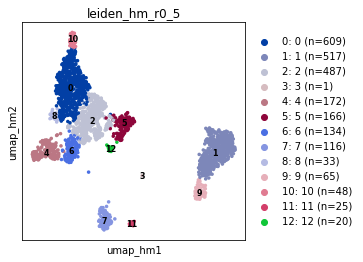

In [26]:
ss.lib.plot_embedding(ad, basis='umap_hm', groupby='leiden_hm_r0_5')

In [ ]:
ad.obs['rachel_annot3'] = ss.lib.regroup(ad, groupby='leiden_hm_r0_5', regroups={
    'Capillary/postcapillary venule': '0',
    'Postcapillary venule': '10',
    'Capillary (venular tip?)': '2',
    'Tip cell (arterial?)': '6',
    'Arterial': '4',
    'Early endothelial cell': ['7', '11'],
    'LE': '1',
    'Early LE': '9',
    'Fibroblast doublet': ['3', '5'],
    'VSMC doublet': '8',
    'Monocyte doublet': '12',
})

In [27]:
ad.obs.rachel_annot3.value_counts()

Capillary/postcapillary venule    609
LE                                517
Capillary (venular tip?)          487
Arterial                          172
Fibroblast doublet                167
Early endothelial cell            141
Tip cell (arterial?)              134
Early LE                           65
Postcapillary venule               48
VSMC doublet                       33
Monocyte doublet                   20
Name: rachel_annot3, dtype: int64

In [ ]:
ad1 = ad[~ad.obs.rachel_annot3.str.endswith('doublet'), :].copy()

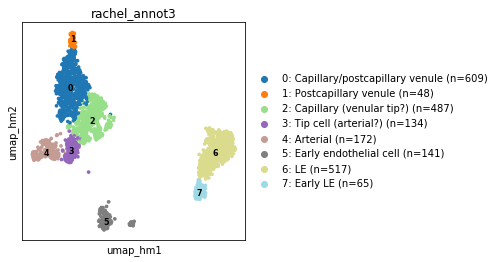

In [28]:
ss.lib.clear_colors(ad1)
ss.lib.plot_embedding(ad1, basis='umap_hm', groupby='rachel_annot3', palette='tab20')

In [ ]:
ad1.write('fetal_skin.endothelium.doublet_removed_processed.20200403.h5ad', compression='lzf')